# Fordgobike Data Exploration
## by Meng Tan

## Preliminary Wrangling

This document explores a dataset containing the whole year (2019) information about approximately 2,506,983 individual rides made in a bike-sharing system in the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import requests
import zipfile
import io
import os
import glob
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Gathering From Website
The data provided by Udacity course is a single month data, I decide to find a whole year data from [LWFT Website](https://www.lyft.com/bikes/bay-wheels) since I'm interested in exploring a longer time period data. 

This is a direct url to [Data Source](https://s3.amazonaws.com/baywheels-data/index.html).

*Note: since the whole year data turns out to be a 353.5MB file, it will take some time to download, combine, and save data. Without suffering from this process, please feel free to jump to <a href="#clean">Assessing And Cleaning Data</a> part.*

In [2]:
# Make directory if it doesn't already exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
baywheels_urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

In [6]:
# Download data from above urls
for url in baywheels_urls:
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(folder_name)

In [7]:
files = [f for f in glob.glob('data/*.csv')]
print(files)

['data/201909-baywheels-tripdata.csv', 'data/201904-fordgobike-tripdata.csv', 'data/201907-baywheels-tripdata.csv', 'data/201903-fordgobike-tripdata.csv', 'data/201906-baywheels-tripdata.csv', 'data/201908-baywheels-tripdata.csv', 'data/201905-baywheels-tripdata.csv', 'data/201901-fordgobike-tripdata.csv', 'data/201910-baywheels-tripdata.csv', 'data/201912-baywheels-tripdata.csv', 'data/201911-baywheels-tripdata.csv', 'data/201902-fordgobike-tripdata.csv']


In [8]:
# Check if all files have same columns
listname = []
for f in files:
    listname = listname + list(pd.read_csv(f).columns)

pd.Series(listname).value_counts()

/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


start_station_latitude     12
start_station_id           12
end_time                   12
end_station_name           12
bike_id                    12
end_station_longitude      12
start_station_name         12
end_station_id             12
end_station_latitude       12
start_time                 12
user_type                  12
duration_sec               12
start_station_longitude    12
bike_share_for_all_trip    11
rental_access_method        4
dtype: int64

In order to combine the whole year data, I decide to remove columns `bike_share_for_all_trip` and `rental_access_method`.

In [9]:
common_cols = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 
               'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name',
               'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type']

In [10]:
bike_whole = pd.concat([pd.read_csv(f)[common_cols] for f in files])

/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
bike_whole.to_pickle('fordgobike_2019.pkl')

<a id='clean'></a>
### Assessing And Cleaning Data

In [2]:
bike = pd.read_pickle('fordgobike_2019.pkl')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber


In [3]:
bike.shape

(2506983, 13)

In [4]:
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

In [5]:
bike.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [6]:
# Convert start_time, end_time into timestamp types
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [7]:
# Check the distribution of missing data in different months
bike.loc[bike.start_station_id.isnull()].start_time.dt.month.value_counts()

7     55887
12    21019
6      2160
11      923
1       248
3       221
2       197
4        64
5        15
Name: start_time, dtype: int64

Since the missing data distributed largely in July and December, if simply removing these data, the analysis of bike using frequency of these two months will be influenced a lot. Therefore, I decide to keep these data.

In [8]:
# Convert start_station_id, end_station_id to int types
bike.start_station_id = bike.start_station_id.astype('Int64')
bike.end_station_id = bike.end_station_id.astype('Int64')

# Convert start_station_name, end_station_name, user_type to categorical types
bike.start_station_name = bike.start_station_name.astype('category')
bike.end_station_name = bike.end_station_name.astype('category')
bike.user_type = bike.user_type.astype('category')

In [9]:
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    Int64
start_station_name               category
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      Int64
end_station_name                 category
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
dtype: object

In [10]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [11]:
bike['start_month'] = bike['start_time'].dt.month
bike['start_hour'] = bike['start_time'].dt.hour
bike['start_weekday'] = bike['start_time'].dt.weekday

In [12]:
def month_name(n):
    if n == 1:
        return 'Jan'
    elif n == 2:
        return 'Feb'
    elif n == 3:
        return 'Mar'
    elif n == 4:
        return 'Apr'
    elif n == 5:
        return 'May'
    elif n == 6:
        return 'June'
    elif n == 7:
        return 'July'
    elif n == 8:
        return 'Aug'
    elif n == 9:
        return 'Sept'
    elif n == 10:
        return 'Oct'
    elif n == 11:
        return 'Nov'
    else:
        return 'Dec'

In [13]:
bike.start_month = bike.start_month.apply(month_name)

In [14]:
month_cat = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_type = pd.api.types.CategoricalDtype(categories=month_cat, ordered=True)
bike.start_month = bike.start_month.astype(month_type)

In [15]:
def week_day(n):
    if n == 0:
        return 'Mon'
    elif n == 1:
        return 'Tue'
    elif n == 2:
        return 'Wed'
    elif n == 3:
        return 'Thur'
    elif n == 4:
        return 'Fri'
    elif n == 5:
        return 'Sat'
    else:
        return 'Sun'

In [16]:
bike.start_weekday = bike.start_weekday.apply(week_day)

In [17]:
weekday_cat = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weekday_type = pd.api.types.CategoricalDtype(categories=weekday_cat, ordered=True)
bike.start_weekday = bike.start_weekday.astype(weekday_type)

In [18]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,Sept,11,Mon
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,Sept,16,Mon
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,Sept,23,Mon
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,Sept,23,Mon
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,Sept,23,Mon


In [19]:
bike['duration_min'] = np.round(bike['duration_sec'] / 60., 2)

In [20]:
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,Sept,11,Mon,1014.38
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,Sept,16,Mon,600.32


In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         Int64         
 4   start_station_name       category      
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           Int64         
 8   end_station_name         category      
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  start_month              category      
 14  start_hour               int64         
 15  start_weekday            category      
 16  duration_min             float64       
dtypes: Int64(2), category(5), da

There must be some duplicated index since it shows 2,506,983 entries with 0 to 183,411 index.

In [22]:
print('The number of duplicated index: {}'.format(bike.index.duplicated().sum()))
print('The number of duplicated observations: {}'.format(bike.duplicated().sum()))

The number of duplicated index: 2248881
The number of duplicated observations: 0


In [23]:
# Reset index
bike.reset_index(drop=True, inplace=True)
print('The number of duplicated index: {}'.format(bike.index.duplicated().sum()))

The number of duplicated index: 0


In [24]:
bike.to_pickle('fordgobike_2019_clean.pkl')

### What is the structure of your dataset?

There are 2,506,983 rides in the dataset with 16 features (duration_sec, duration_min, start_time, end_time, start_station_id, end_station_id, start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, bike_id, user_type, start_month, start_hour, start_weekday). 

Most variables are numeric in nature, but the variables start_station_name, end_station_name, user_type, start_month, and start_weekday are category types, in which start_month and start_weekday are also ordered factor variables (in chronological month order and weekday order: from Jan to Dec, and from Mon to Sun).

### What is/are the main feature(s) of interest in your dataset?

I'm interested in figuring out what features will influence bike demands most in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that start_time, user_type, and station address will have effects on bike demands: during rush hours, there will be more needs for bikes; subscribers may have more bike demands than casual users; the busier the geological address, the more the demands. 

In [2]:
# Load cleaned data
df = pd.read_pickle('fordgobike_2019_clean.pkl')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,Sept,11,Mon,1014.38
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,Sept,16,Mon,600.32
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,Sept,23,Mon,93.58
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,Sept,23,Mon,24.70
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,Sept,23,Mon,21.20


## Univariate Exploration

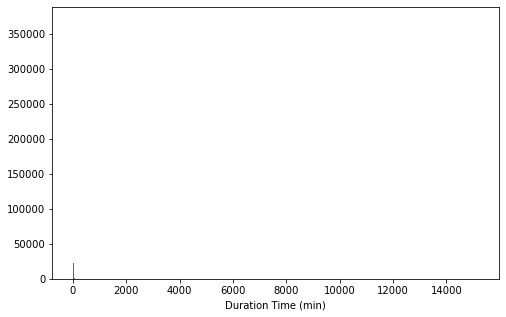

In [3]:
# Start with a standard-scale plot
binsize = 2
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration Time (min)');

The far right limit of above plot shows that there exists unusual large values.

In [4]:
duration_outlier = df['duration_min']>2000
df.loc[duration_outlier]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min
2112368,912110,2019-12-19 23:15:36,2019-12-30 12:37:26,<NA>,NaN,37.323757,-121.878614,<NA>,NaN,37.327656,-121.868598,614329,Customer,Dec,23,Thur,15201.83


It seems impossible for a ride to last 15,202 minutes, so I decide to remove this observation.

In [5]:
df = df.loc[-duration_outlier, :].reset_index(drop=True)

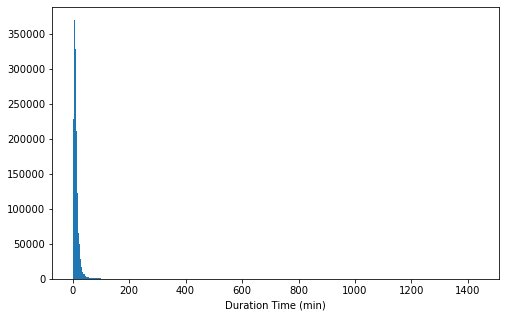

In [6]:
binsize = 2
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration Time (min)');

The above plot suggests there still exists outliers.

In [7]:
duration_outlier = df['duration_min']>200
print(duration_outlier.sum())
df.loc[duration_outlier]

5549


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,Sept,11,Mon,1014.38
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,Sept,16,Mon,600.32
61,16562,2019-09-30 18:12:07.788,2019-09-30 22:48:10.522,241,Ashby BART Station,37.852477,-122.270213,188,Dover St at 57th St,37.842630,-122.267738,10468,Customer,Sept,18,Mon,276.03
266,23268,2019-09-30 14:47:55.653,2019-09-30 21:15:44.362,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,12062,Customer,Sept,14,Mon,387.80
292,46131,2019-09-30 08:19:53.428,2019-09-30 21:08:44.756,205,Miles Ave at Cavour St,37.838800,-122.258732,171,Rockridge BART Station,37.844279,-122.251900,2997,Customer,Sept,8,Mon,768.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502226,12894,2019-02-01 13:13:12.725,2019-02-01 16:48:07.003,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5105,Subscriber,Feb,13,Fri,214.90
2502725,15408,2019-02-01 10:59:57.927,2019-02-01 15:16:46.059,54,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,491,Customer,Feb,10,Fri,256.80
2505981,13609,2019-02-01 04:38:43.601,2019-02-01 08:25:33.493,106,Sanchez St at 17th St,37.763242,-122.430675,79,7th St at Brannan St,37.773492,-122.403673,4944,Subscriber,Feb,4,Fri,226.82
2506785,17953,2019-02-01 01:39:13.098,2019-02-01 06:38:26.681,86,Market St at Dolores St,37.769305,-122.426826,356,Valencia St at Clinton Park,37.769188,-122.422285,2947,Customer,Feb,1,Fri,299.22


It shows that 5549 observations are outliers, but after inspecting the data, I'm lack of evidence to simply drop them. And since duration time follows a right-skewed distribution, I decide to apply log transformation to plot this variable instead. 

In [8]:
np.log10(df.duration_min).describe()

count    2.506982e+06
mean     9.793192e-01
std      3.140058e-01
min      0.000000e+00
25%      7.767012e-01
50%      9.786369e-01
75%      1.169674e+00
max      3.157508e+00
Name: duration_min, dtype: float64

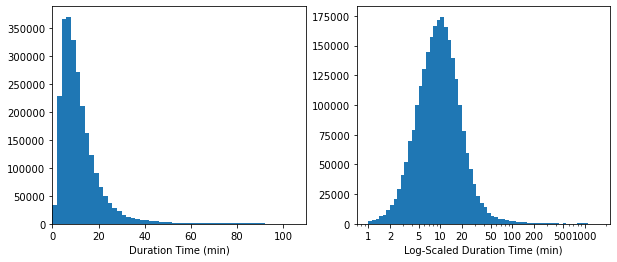

In [209]:
# Plot standard-scaled duration time and log-scaled duration time together
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
binsize = 2
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlim((0,110))
plt.xlabel('Duration Time (min)');


plt.subplot(1, 2, 2)
log_binsize = 0.05
bins = 10 ** np.arange(0, 3.16+log_binsize, log_binsize)

plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
x_ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Log-Scaled Duration Time (min)');

- Standard-scaled duration time plot has a long tail on the right, which shows that a lot of rides last a short period(<20min), and few rides last a long time(>40min). 
- Log-scale plot shows a roughly normal (still a little right-skewed) distribution, with a peak near 10 minutes.

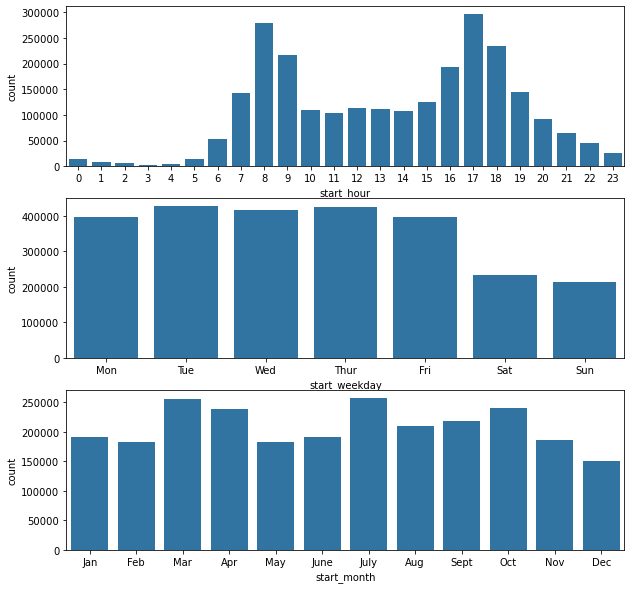

In [210]:
# Plot all three start time related variables (start_hour, start_weekday, start_month) together

fig, ax = plt.subplots(nrows=3, figsize=[10, 10])

base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_hour', color=base_color, ax=ax[0])
sns.countplot(data=df, x='start_weekday', color=base_color, ax=ax[1])
sns.countplot(data=df, x='start_month', color=base_color, ax=ax[2]);

- The distribution of start riding hour looks bimodal, with a lot of rides happened during 7 to 9 in the morning, and 4 to 7 in the afternoon, which are rush hours as expected.
- Lots of rides happened during weekdays, and few rides happened weekends. It seems that one of main purposes of using sharing bike is to go to work or study.
- July, March, and April see more rides during a year, while December sees the fewest rides. December, January, and February are cold months, maybe the reason for decreasing use of this system is the weather or temperature. However, due to the lack of weather data, we can not figure out it in this project.

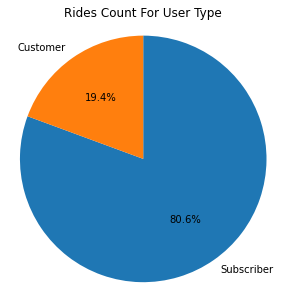

In [11]:
# Plot the user type

sorted_counts_user = df.user_type.value_counts()

plt.figure(figsize=[8, 5])
plt.pie(sorted_counts_user, labels=sorted_counts_user.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square')
plt.title('Rides Count For User Type');

For user type, we can get that subscribers contribute much more rides than casual users.

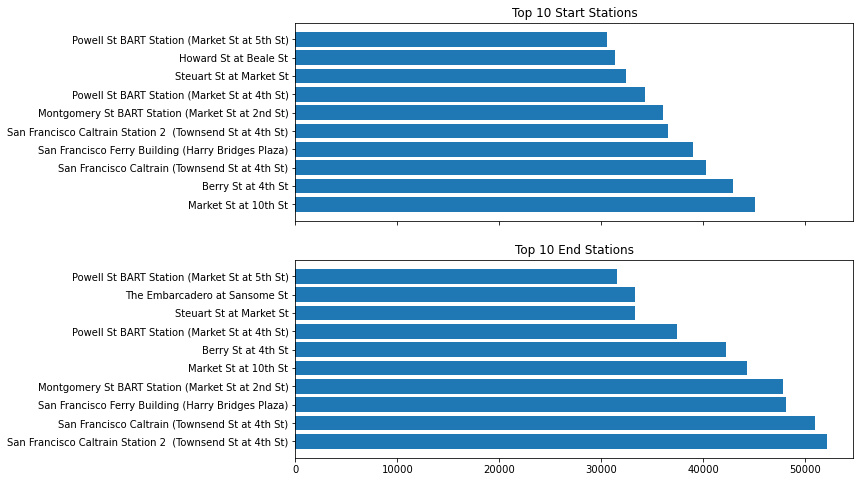

In [12]:
# Plot the top 10 busiest stations
start_counts_top10 = df.start_station_name.value_counts()[:10]
end_counts_top10 = df.end_station_name.value_counts()[:10]

fig, ax = plt.subplots(nrows=2, figsize=[10, 8], sharex=True)
ax[0].barh(y=start_counts_top10.index, width=start_counts_top10)
ax[0].set_title('Top 10 Start Stations')
ax[1].barh(y=end_counts_top10.index, width=end_counts_top10);
ax[1].set_title('Top 10 End Stations');

In [13]:
pd.Series(list(start_counts_top10.index) + list(end_counts_top10.index)).duplicated().sum()

9

- Nine out of ten top busiest stations are the same. 
- Much busier for end stations than start stations, since the busiest start station sees near 45,000 rides while the busiest end station sees near 53,000 rides for a whole year.

In [14]:
station_coords = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

df[station_coords].describe()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.506982e+06,2.506982e+06,2.506982e+06,2.506982e+06
mean,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02
std,1.363696e-01,3.089648e-01,2.392884e-01,7.080418e-01
min,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02
25%,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02
50%,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02
75%,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02
max,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


In [15]:
def coord_hist(binsize=0.01, figsize=[10, 8]):
    
    bins_lat = np.arange(df.start_station_latitude.min(), df.start_station_latitude.max()+binsize, binsize)
    bins_lon = np.arange(df.start_station_longitude.min(), df.start_station_longitude.max()+binsize, binsize)
    
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=figsize)
    ax[0, 0].hist(data=df, x='start_station_latitude', bins=bins_lat)
    ax[0, 0].set_xlabel('start_station_latitude')
    
    ax[0, 1].hist(data=df, x='start_station_longitude', bins=bins_lon)
    ax[0, 1].set_xlabel('start_station_longitude')
    
    ax[1, 0].hist(data=df, x='end_station_latitude', bins=bins_lat)
    ax[1, 0].set_xlabel('end_station_latitude')
    
    ax[1, 1].hist(data=df, x='end_station_longitude', bins=bins_lon)
    ax[1, 1].set_xlabel('end_station_longitude');

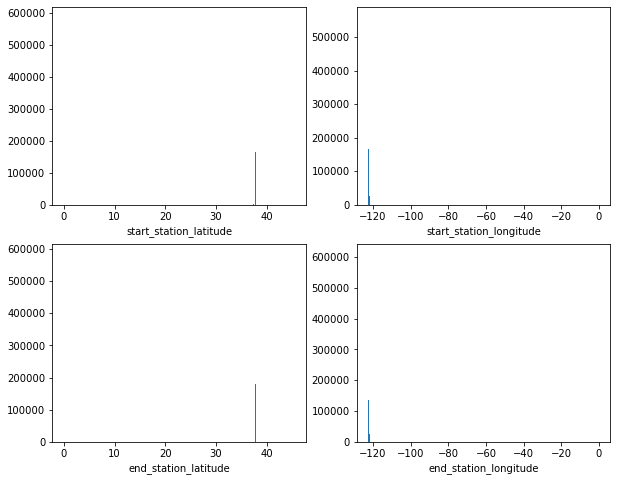

In [16]:
# Plot station latitude and longitude
coord_hist()

The left and right limits for latitude plots suggest that there are some points that take unusually small and large values. The right limits for longitude plots suggest that there are some points that take unusually large values. We need to filter out these outliers.

In [17]:
# Select outliers
coord_outliers = (df['start_station_latitude'] < 36) | (df['start_station_latitude'] > 39) | (df['start_station_longitude'] > -120) | (df['end_station_latitude'] < 36) | (df['end_station_latitude'] > 39) | (df['end_station_longitude'] > -120)

print(coord_outliers.sum())
pd.set_option('display.max_rows', 150)
df.loc[coord_outliers, :]

103


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min
219163,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.000000,0.000000,1612,Subscriber,Apr,18,Tue,39.42
219929,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.000000,0.000000,3507,Subscriber,Apr,17,Tue,32.73
220083,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.000000,0.000000,1142,Subscriber,Apr,17,Tue,9.10
220162,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.000000,0.000000,3500,Subscriber,Apr,17,Tue,10.50
220615,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.000000,0.000000,1181,Subscriber,Apr,17,Tue,7.22
220698,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.000000,0.000000,2535,Subscriber,Apr,16,Tue,20.55
220730,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.000000,0.000000,462,Subscriber,Apr,16,Tue,21.77
221021,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.000000,0.000000,1880,Customer,Apr,16,Tue,12.73
233272,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.000000,0.000000,150,Customer,Apr,18,Sun,24.85
233325,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.000000,0.000000,311,Subscriber,Apr,18,Sun,11.33


In [18]:
# Reset the display option back to default display parameter
pd.reset_option('display.max_rows')

In [19]:
df_coord_out = df.loc[coord_outliers, :]
df_coord_out.end_station_name.value_counts()[:10]

16th Depot Bike Fleet Station                                      61
SF Test Station                                                    19
MTL-ECO5-01                                                         4
Philly Demo                                                         2
Berry St at 4th St                                                  1
Davis St at Jackson St                                              0
Civic Center/UN Plaza BART Station (Market St at McAllister St)     0
Clay St at Battery St                                               0
College Ave at Alcatraz Ave                                         0
College Ave at Bryant Ave                                           0
Name: end_station_name, dtype: int64

In [20]:
((df['start_station_name'] == '16th Depot Bike Fleet Station') | (df['end_station_name'] == '16th Depot Bike Fleet Station')).sum()

72

There are 103 observations with unusual values shown above. From station names('SF Test Station', 'MTL-ECO5-01', 'Philly Demo'), we can see that lots of the observations are for test purposes. But I am not sure about station named '16th Depot Bike Fleet Station', so I decide to check if it runs as normal station. The result turns out that there are only 72 ride records for this station, which testifies that it is not a normal station.

After checking all the outliers information, I decide to remove all of these points from the data.

In [21]:
# Remove outliers
df = df.loc[-coord_outliers, :].reset_index(drop=True)

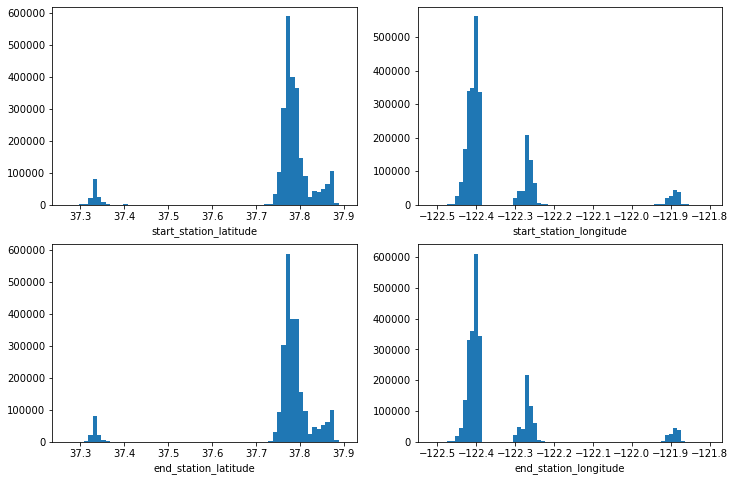

In [22]:
# Plot station latitude and longitude after removing outliers
coord_hist(figsize=[12,8])

- From both start and end station coordinates' distributions, we can confirm that the start stations coordinates' ranges are consistent with end stations coordinates'.
- Interestingly, it seems that rides happened in several geologically separate areas.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration time has a long tail on the right, so I used log transformation to show data. With log-scaled plot, the data looked roughly normal, still a little right-skewed, with one peak around 10 mintues.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
When investigating stations' latitude and longitude information, 103 unusual data points have been detected. After inspecting these outliers, I decide to remove them because they are system test observations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [23]:
numeric_vars = ['duration_min', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
               'end_station_longitude']
categoric_vars = ['user_type', 'start_month', 'start_weekday', 'start_hour']

Even though the data type for 'start_hour' is int, I decide to put it in categorical variable list.

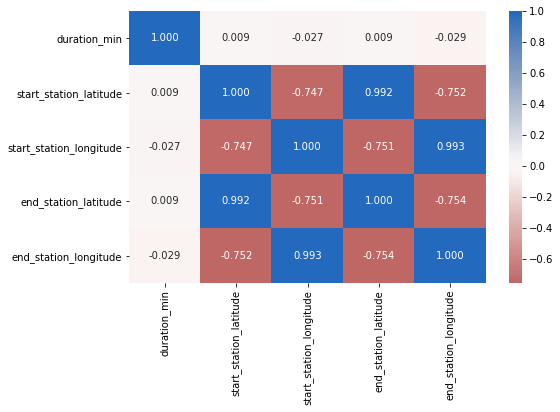

In [24]:
# Correlation plot first
plt.figure(figsize=[8, 5])
sns.heatmap(df[numeric_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);

It seems duration time has no correlation with geological coordinates.

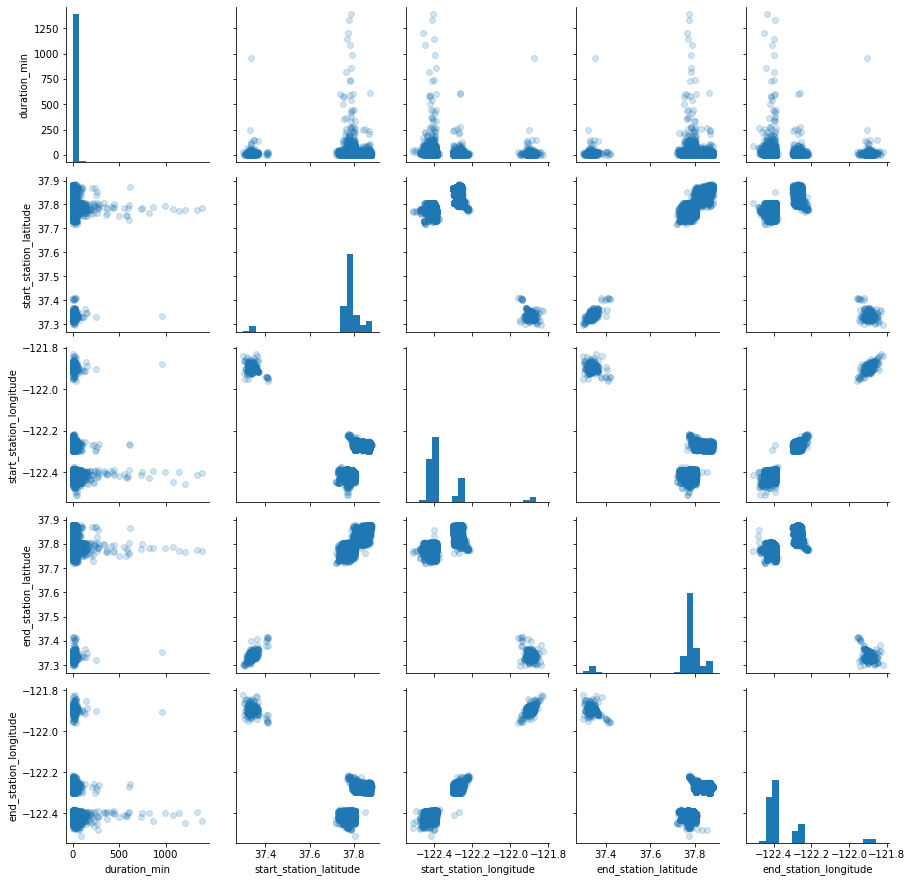

In [25]:
# Plot matrix: sample 20000 rides for faster speed and clearer plot purposes
samples = np.random.choice(df.shape[0], 20000, replace=False)
df_samp = df.reindex(index=samples)

g = sns.PairGrid(data=df_samp, vars=numeric_vars)
g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=1/5);

- As expected, rides mainly happened in three main area. From above plot, it seems one area has less ride demands than the other two areas.
- Except high correlated coordinates, there seems little correlation between duration time and coordinates.

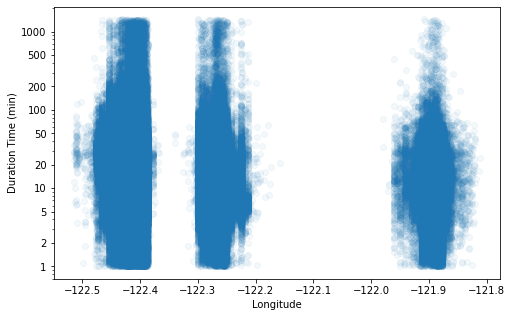

In [26]:
# Scatter plot of duration_min vs. station_longitude, with log transform on duration_min axis
plt.figure(figsize=[8,5])
plt.scatter(data=df, x='start_station_longitude', y='duration_min', alpha=1/20)
plt.yscale('log')
y_ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.yticks(y_ticks, y_ticks)
plt.ylabel('Duration Time (min)')
plt.xlabel('Longitude');

**Longitude vs. Duration minutes(log)**
- From left to right, the leftmost area sees the most traffic and the more longer trips(>200min).
- The rightmost area sees clearly more shorter trips(<150min).
- The difference of bike demands maybe due to the surface size or population density.

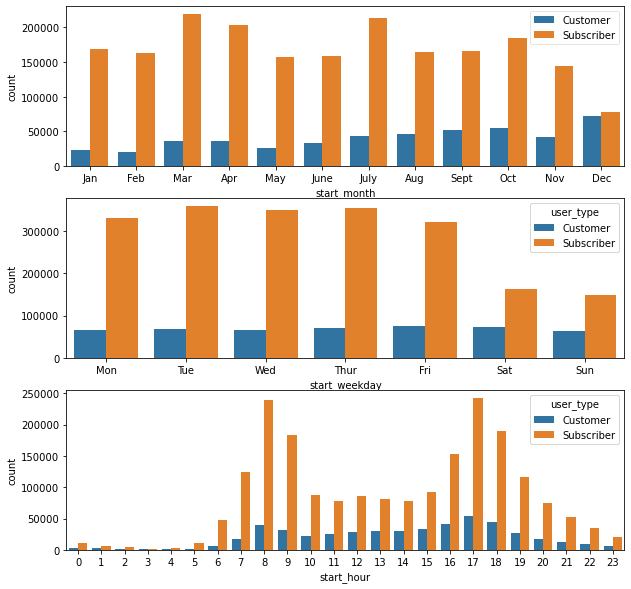

In [92]:
# Look at the relationships between user_type and other three categorical features

def count_plot(data, x, hue='user_type', **kwargs):
    sns.countplot(data=data, x=x, hue=hue);

plt.figure(figsize=[10, 10])

ax=plt.subplot(3, 1, 1)
count_plot(data=df, x='start_month')
ax.legend(framealpha=0.5)

plt.subplot(3, 1, 2)
count_plot(data=df, x='start_weekday')

plt.subplot(3, 1, 3)
count_plot(data=df, x='start_hour')

**Month vs. User type**:
- For subscriber, March and July are busiest months, while December has fewest rides, which perhaps is due to the cold weather or Christmas holiday. Since we don't have the weather data, we can only dip into if it is influenced by holiday later.
- For customer, surprisingly, even though December is cold, it is the busiest month, which is the opposite of the subscriber's.

**Weekday vs. User type**:
- For subscriber, working days see a nearly or more than double rides of weekends, which may suggest at least half of subscribers need to ride to work or study.
- For customer, which day of week has little influence on the ride demands, since there's little difference of trips count from Monday to Sunday.

**Start hour vs. User type**:
- For subscriber, as expected, rush hours(8am and 5pm) see the highest ride demands, which suggests again that subscribers need to ride to work or home.
- For customer, it also shows a roughly bimodal distribution, but it is less clear when compared to subscriber's distribution.

In [28]:
# Extract the December rides data
df_Dec = df.loc[df['start_month'] == 'Dec'].reset_index(drop=True)

# Extract start_date from start_time colume
df_Dec['start_date'] = df_Dec['start_time'].dt.day

In [29]:
df_Dec.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min,start_date
0,66600,2019-12-31 14:28:50.286,2020-01-01 08:58:51.250,364,China Basin St at 3rd St,37.772000,-122.389970,349,Howard St at Mary St,37.78101,-122.405666,12085,Customer,Dec,14,Tue,1110.00,31
1,36526,2019-12-31 21:52:47.762,2020-01-01 08:01:33.932,38,The Embarcadero at Pier 38,37.782926,-122.387921,410,Illinois St at Cesar Chavez St,37.75020,-122.386567,9477,Customer,Dec,21,Tue,608.77,31


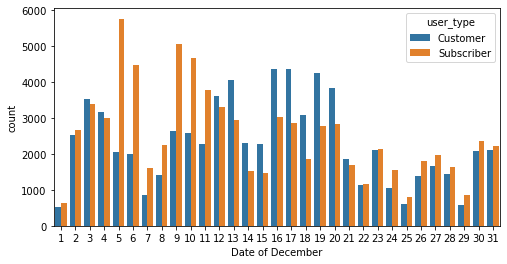

In [94]:
# Plot the countplot of December data
plt.figure(figsize=[8, 4])
count_plot(x='start_date', data=df_Dec)
plt.xlabel('Date of December');

**Date of December vs. User type**
- There is a gradually decreasing trend for subscriber, especially after December 20th. As expected, there is low demands around Christmas day.
- Interestingly, from December 13th to December 20th, customer's demands is much higher than subscriber's. Since we only have one year data, we don't know if it is common for December or just because some special events happened at that time.

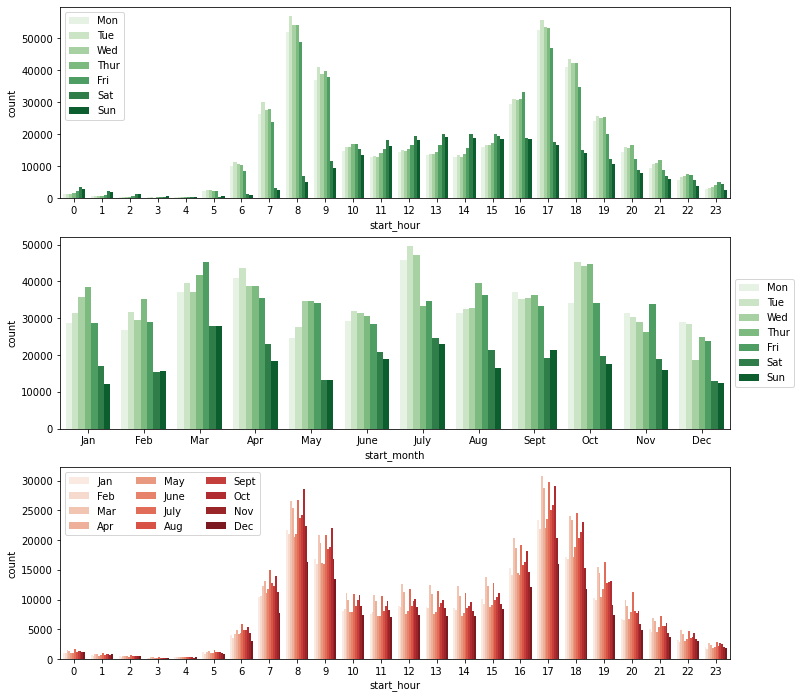

In [219]:
# # Look at the relationships between three categorical time features

plt.figure(figsize=[12, 12])

plt.subplot(3, 1, 1)
sns.countplot(data=df, x='start_hour', hue='start_weekday', palette='Greens')
plt.legend(loc=2);

plt.subplot(3, 1, 2)
sns.countplot(data=df, x='start_month', hue='start_weekday', palette='Greens')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

plt.subplot(3, 1, 3)
sns.countplot(data=df, x='start_hour', hue='start_month', palette='Reds')
plt.legend(ncol=3);

**Start hour vs. Weekday**
- On weekdays, most of ride demands happened during rush hours (7:00-9:00, 16:00-18:00).
- On weekends, most of ride demands happened from 11:00 to 16:00, which is totally different from weekdays.
- Specifically, from 11:00 to 15:00, weekends have a slightly more demands than the same hours on weekdays. 

**Month vs. Weekday**
- The distributions for weekdays and weekends through months are consistent. When there are more rides happened in one month, not only the weekdays has higher demands, but also weekends has higher demands than other months.
- It seems that the demands distribution from Monday to Friday fluctuates through months, but with information we obtained until now, we can't explain things like why Tuesday has most rides in Jan, Feb, Mar, and Nov.

**Start hour vs. Month**
- The demands distributions from Jan to Dec are very similar through hours from 6:00 to 22:00. Since there are relatively very small demands for the rest hours(23:00,and 0:00-5:00), the distribution pattern for these hours is difficult to recognize. More specifically, Mar, Apr, July, and Oct are four months generally having higher ride demands than other months through hours from 6:00 to 22:00. To conclude, there doesn't seem to be that much interaction between ride hour and month.

In [32]:
# Compute the logarithm of duration_min
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return x ** 10
df['log_min'] = df['duration_min'].apply(log_trans)

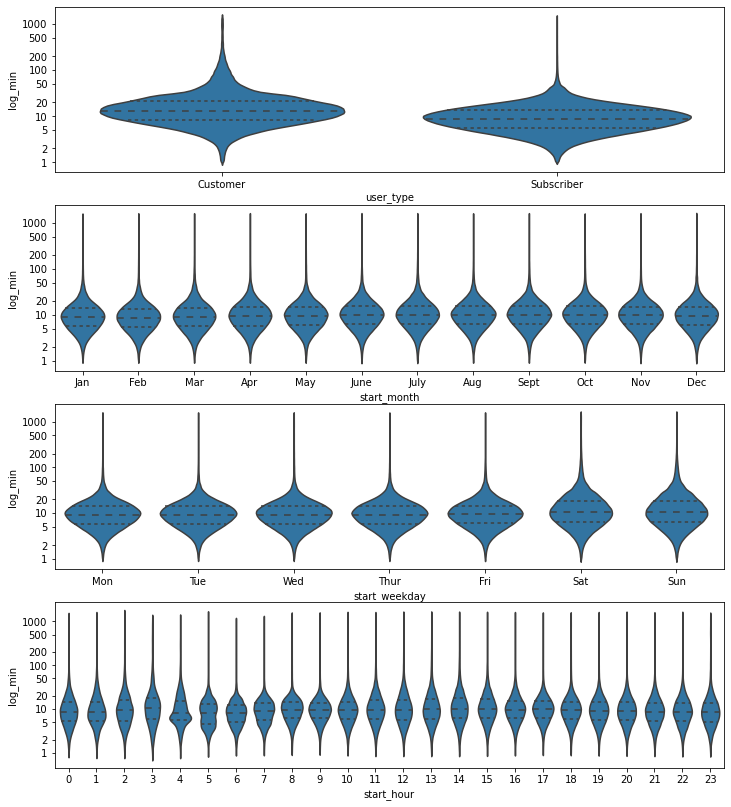

In [220]:
#Plot the logarithm of duration_min

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=[12, 14])
base_color = sns.color_palette()[0]
y_ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

for i in range(len(categoric_vars)):
    sns.violinplot(data=df, x=categoric_vars[i], y='log_min', ax=ax[i], 
                   color=base_color, inner='quartile');
    ax[i].set_yticks(log_trans(y_ticks))
    ax[i].set_yticklabels(y_ticks);

**User type vs. Duration minuets(log)**
- Customers generally rides longer than subscribers.

**Month vs. Duration minuets(log)**
- From June to October, people tend to rides slightly longer than other months.

**Weekday vs. Duration minuets(log)**
- Generally, people rides longer on weekends than on working days.

**Start hour vs. Duration minuets(log)**
- The duration minutes fluctuates largely from 3:00 to 7:00. 
- The distributions of duration minutes for 8:00, 9:00, 17:00, and 18:00 are much narrower than other hours.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

My feature of interest is ride demands, so we can use the number of rides (count) and ride duration time (duration_mins) to describe the ride demands. Because of the long right tail of duration_min distribution, I applied log transformation when exploring the relationship between duration time and other categorical features.

During this part of the investigation, we found that:

**For rides count**: 

- Most of rides made by subscribers from Monday to Sunday, from January to November, and from 0:00 to 23:00. But for December, the demands are nearly the same for subscribers and customers. When digging a little deeper to the days of December, there are less demands around Christmas. 
- The demands for customer are equally distributed through Monday to Sunday, while most rides by subscribers are distributed through working days. Another phenomenon, which also suggests that subscribers tend to ride for working purpose, is that the two peaks of subscriber rides distribution located clearly at rush hours, while it is less noticeable for customers. 
- For weekends, most rides made from 11:00 to 16:00, which is very different from weekdays whose busiest hours are 7:00-9:00, 16:00-19:00.

**For ride duration time**:

- Customers generally rides longer than subscribers. From June to October, people tend to rides slightly longer than other months.
- Generally, people rides longer on weekends than on working days.
- The duration minutes fluctuates largely from 3:00 to 7:00. 
- The distributions of duration minutes for 8:00, 9:00, 17:00, and 18:00 are much narrower than other hours.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, there are very strong correlation between longitudes and latitudes. From scatter map, we can see that there are three separate areas with lots of ride points. The area with the longitude from (-122.5, -122.35) has larger number of ride demands with longer duration time.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

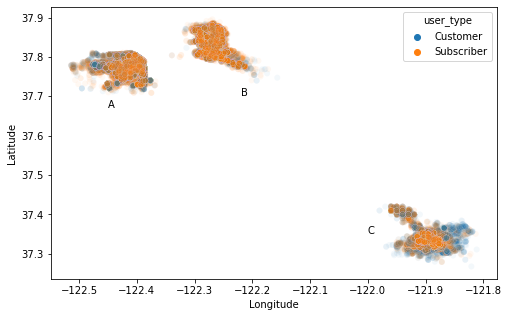

In [73]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=df, y='start_station_latitude', x='start_station_longitude', hue='user_type', alpha=1/20)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.text(-122, 37.35, 'C')
plt.text(-122.22, 37.7, 'B')
plt.text(-122.45, 37.67, 'A');

Since there are huge amount of observations, the information we can get from is very limited. Therefore, I decide to show these three area separately.

In [51]:
# Split the data into three dataframes based on the logitude
df_a = df.loc[df['start_station_longitude'] <= -122.35].reset_index(drop=True)
df_b = df.loc[(df['start_station_longitude'] > -122.35) & (df['start_station_longitude'] < -122.15)].reset_index(drop=True)
df_c = df.loc[df['start_station_longitude'] >= -122.15].reset_index(drop=True)

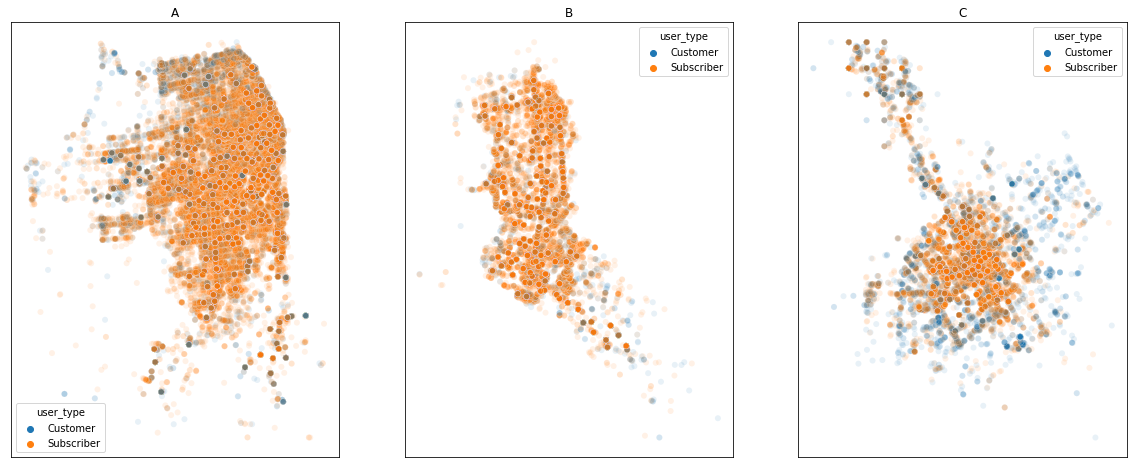

In [68]:
# Plot A, B, C area separately
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20, 8])

sns.scatterplot(data=df_a, y='start_station_latitude', x='start_station_longitude', 
                hue='user_type', alpha=1/10, x_jitter=0.01, ax=ax[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('A')
sns.scatterplot(data=df_b, y='start_station_latitude', x='start_station_longitude', 
                hue='user_type', alpha=1/10, x_jitter=0.01, ax=ax[1])
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('B')
sns.scatterplot(data=df_c, y='start_station_latitude', x='start_station_longitude', 
                hue='user_type', alpha=1/10, x_jitter=0.01, ax=ax[2])
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title('C');

Now, it is more clear to see that subscribers dominated the A, B area and the center of C area:
- Area A has the busiest traffic, and most rides happened in the Northeast area. Then for the northern part, the traffic gradually decreased from east to west; for the southern part, the traffic decreased from north to south. More customers (blue points) are seen in the northwest part.
- Area B has the most compact traffic, less sparse when compared to A and C.
- Area C has the most sparse traffic, which maybe due to the least traffic in this area (this information gained from Bivariate Exploration part). More subscribers are seen in the central part, while more customers ride in the periphery of area C.

I'm also curious about how this traffic changes from month to month for these three regions, so I decide to plot them with month data.

In [117]:
def scatter_plot(x, y, hue, **kwargs):
    ax = sns.scatterplot(x=x, y=y, hue=hue, alpha=1/5, x_jitter=0.01)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [133]:
def facet_scatter(data, title, col='start_month', col_wrap=6, height=3, legend_out=True):
    g = sns.FacetGrid(data=data, col=col, col_wrap=col_wrap, height=height, legend_out=legend_out)
    g.map(scatter_plot, 'start_station_longitude', 'start_station_latitude', 'user_type')
    g.set_titles(col_template='{col_name}')
    g.add_legend();
    plt.suptitle(title, fontsize=16)
    g.tight_layout();

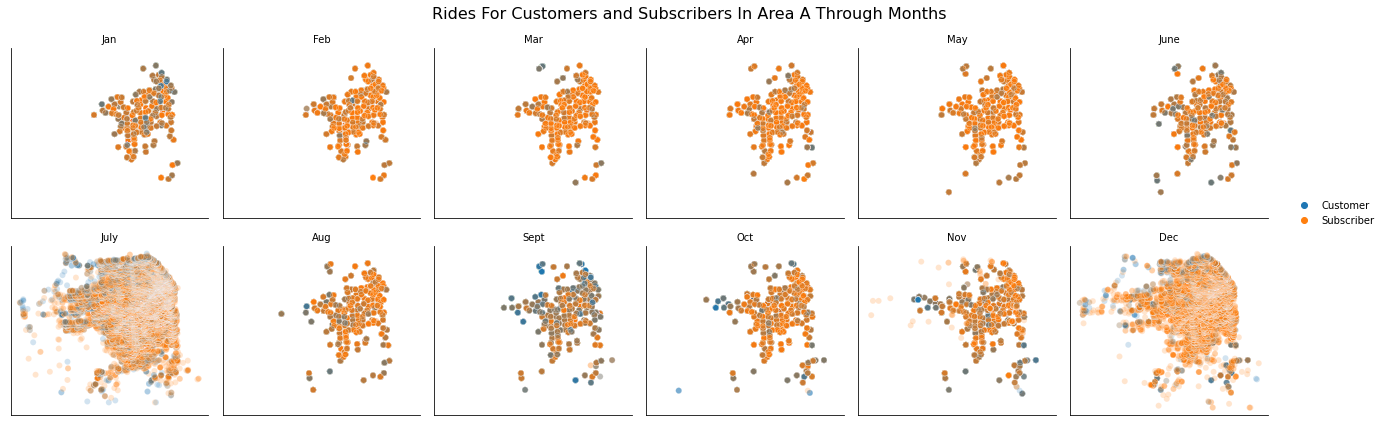

In [134]:
facet_scatter(data=df_a, title='Rides For Customers and Subscribers In Area A Through Months')

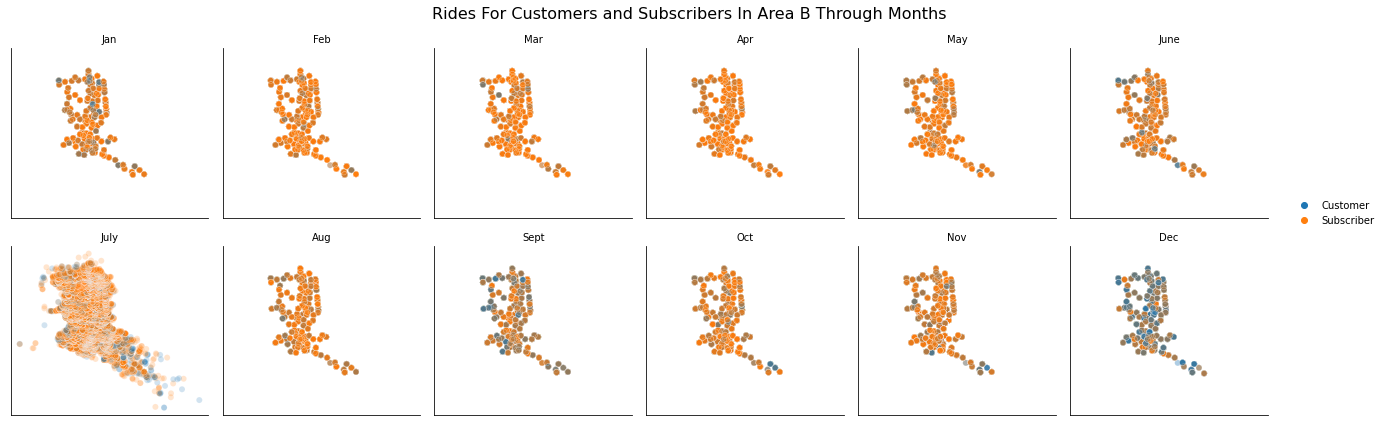

In [137]:
facet_scatter(data=df_b, title='Rides For Customers and Subscribers In Area B Through Months')

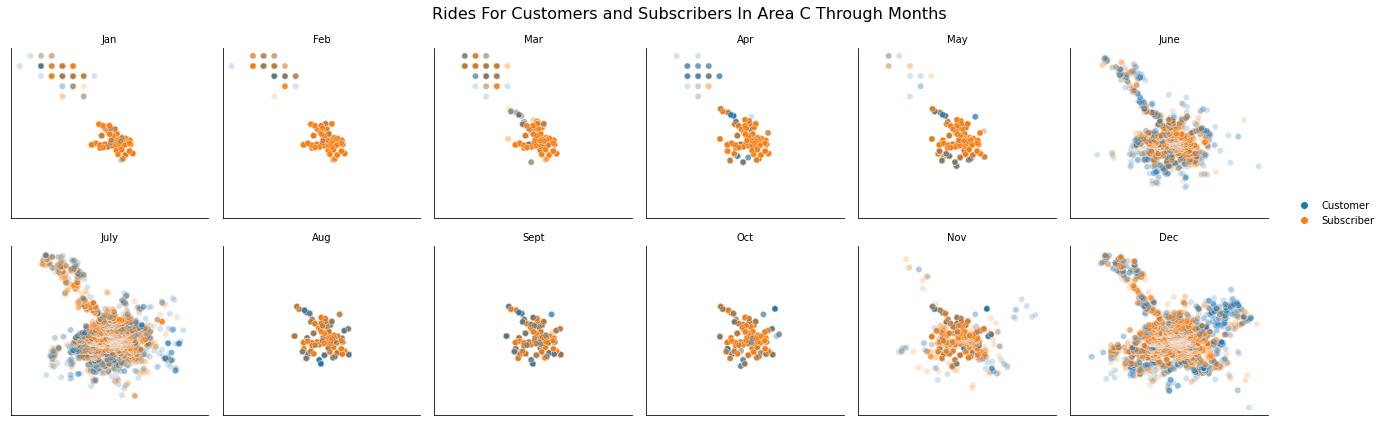

In [138]:
facet_scatter(data=df_c, title='Rides For Customers and Subscribers In Area C Through Months')

After ploting the above scatter plots, we found that there are dramatic shifts from month to month for those three regions: For A and C, there is an expanding tendency from January to July, especially for C, the tendency is more clear than A. For B, July has a sharp expanding from June. Then after the most spreading status of July, there's a sudden shrinking status for all three regions and it seems that it comes back to the same status of May. Then this expanding tendency starts again from October for A and C, and December has another peak of spreading. For B, there's no spreading at all, but it seems relatively more customers choose to ride than subscribers.

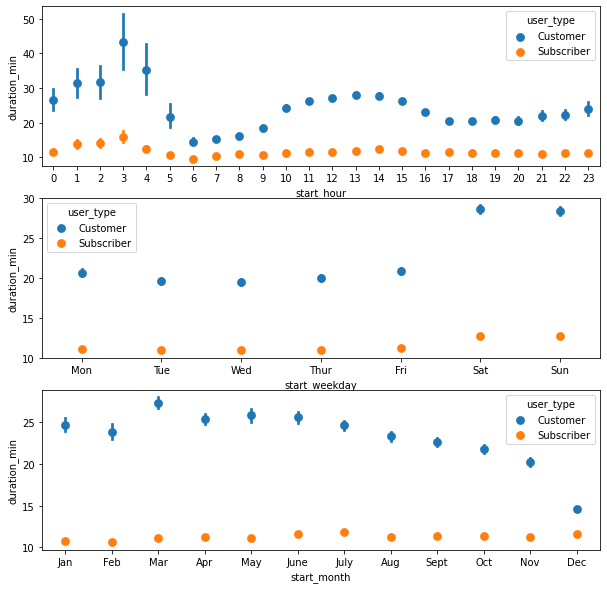

In [95]:
fig, ax = plt.subplots(nrows=3, figsize=[10, 10])
sns.pointplot(data=df, x='start_hour', y='duration_min', hue='user_type', linestyles='', ax=ax[0])
sns.pointplot(data=df, x='start_weekday', y='duration_min', hue='user_type', linestyles='', ax=ax[1])
sns.pointplot(data=df, x='start_month', y='duration_min', hue='user_type', linestyles='', ax=ax[2]);

**For duration time, customers always tend to ride longer than subscribers:**

- Start_hour for both, more fluctuations happened during 1:00-5:00. Then for subscribers, they tend to ride for 10 minutes; for customers, during rush hours they tend to ride 15 to 20 minutes, other hours more than 20 minutes.
- Start_weekday for both, longer rides happened on weedends compared to working days. And the increasing percentage for customers is higher than that for subscribers.
- Through months, the riding duration time is generally decreasing for customers, and the most drastic decrease happened in December; there are some relatively some fluctuations for subscribers, and most of them tend to ride a little longer for July.

Then I want to explore more into the relationship among duration minutes, time of a day, and day of a week.

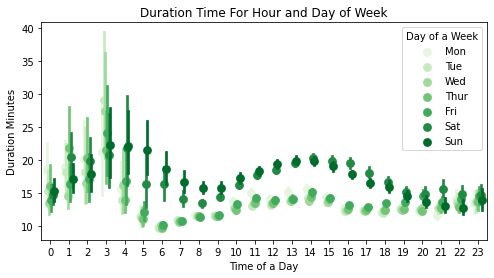

In [205]:
# Duration tendency related to time of a day and day of a week
plt.figure(figsize=[8, 4])
sns.pointplot(data=df, x='start_hour', y='duration_min', hue='start_weekday', 
              palette='Greens', linestyles='', dodge=0.4)
plt.xlabel('Time of a Day')
plt.ylabel('Duration Minutes')
plt.legend(title='Day of a Week')
plt.title('Duration Time For Hour And Day of Week');

- Before 7:00, there is larger uncertainty of ride minutes for both weekdays and weekends. 
- After 20:00, the duration time are similar for weekdays and weekends. 
- From 6:00 to 18:00, there's a big gap for weekdays and weekends.
- In general, the duration time change tendency for weekdays and weekends are similar, except the change for weekends is shaper than weekdays.

In [34]:
lat_min = df.start_station_latitude.min()
lat_max = df.start_station_latitude.max()
lon_min = df.start_station_longitude.min()
lon_max = df.start_station_longitude.max()

binsize=0.02
bins_y = np.arange(lat_min, lat_max+binsize, binsize)
bins_x = np.arange(lon_min, lon_max+binsize, binsize)

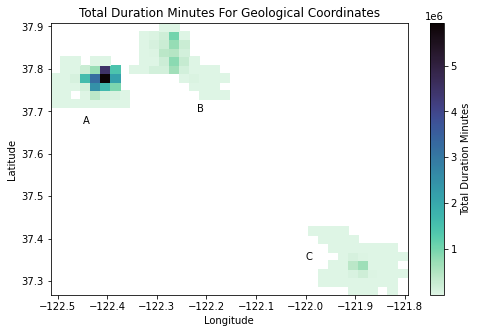

In [36]:
plt.figure(figsize=[8,5])
plt.hist2d(data=df, x='start_station_longitude', y='start_station_latitude', bins=[bins_x, bins_y], 
           weights='duration_min', cmap='mako_r',cmin=0.5)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.colorbar().set_label('Total Duration Minutes')
plt.title('Total Duration Minutes For Geological Coordinates')
plt.text(-122, 37.35, 'C')
plt.text(-122.22, 37.7, 'B')
plt.text(-122.45, 37.67, 'A');

For the whole 2019, the northeast of area A achieved the highest bike duration time among total three areas, and some blocks of area A even saw a total riding time more than five million minutes. For area B and C, the riding time distributed evenly through blocks, except a little busier in central parts. 

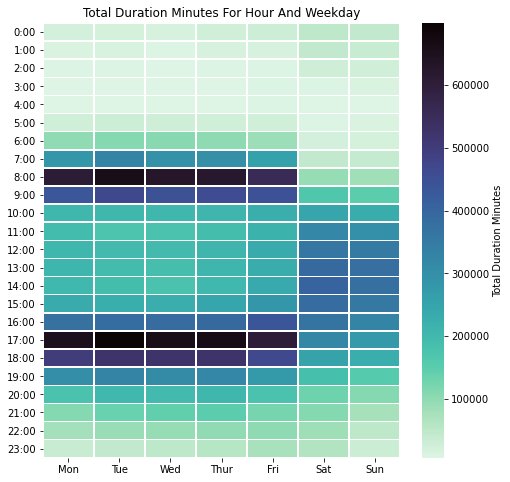

In [202]:
hour_week_min = df.pivot_table(index='start_hour', columns='start_weekday',  values='duration_min', aggfunc=sum)

plt.figure(figsize=[8,8])
g = sns.heatmap(hour_week_min, cmap='mako_r', linewidths=.5, 
            cbar_kws={'label': 'Total Duration Minutes'})
hour_loc = np.arange(0.5, 24.5).tolist()
hour_ticks = ['{}:00'.format(i) for i in range(24)] 
plt.yticks(hour_loc, hour_ticks, rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Duration Minutes For Hour And Weekday');

From above heatmap, we can conclude that:
- From Monday to Friday, the total duration time for each hour is more than 0.6m minutes around 8:00 and 17:00; when it is not rush hours, 0:00-6:00 is a time range with fewest duration minutes, while 10:00-15:00 produces more ride minutes than 20:00-23:00. 
- For weekends, the situation changes completely. They only show one peak through a whole day, which is round 11:00-16:00.
- In general, weekdays achieved more duration time than weekends, and there are total different peak periods between weekdays and weekends.

Due to the information we gained from previous work, I think there probably are some relationships betwen user types and this difference.

In [206]:
# Create two sub dataframes based on user type
df_customer = df.loc[df['user_type'] == 'Customer'].reset_index(drop=True)
df_subscriber = df.loc[df['user_type'] == 'Subscriber'].reset_index(drop=True)

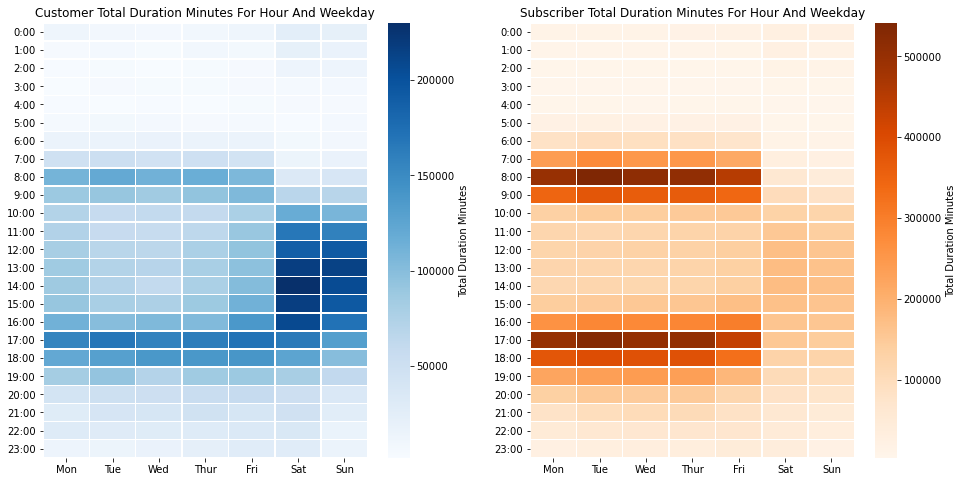

In [208]:
hwm_cus = df_customer.pivot_table(index='start_hour', columns='start_weekday',  values='duration_min', aggfunc=sum)
hwm_sub = df_subscriber.pivot_table(index='start_hour', columns='start_weekday',  values='duration_min', aggfunc=sum)

plt.figure(figsize=[16,8])

plt.subplot(1, 2, 1)
sns.heatmap(hwm_cus, cmap='Blues', linewidths=.5, 
            cbar_kws={'label': 'Total Duration Minutes'})
hour_loc = np.arange(0.5, 24.5).tolist()
hour_ticks = ['{}:00'.format(i) for i in range(24)] 
plt.yticks(hour_loc, hour_ticks, rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.title('Customer Totabl Duration Minutes For Hour And Weekday');

plt.subplot(1, 2, 2)
sns.heatmap(hwm_sub, cmap='Oranges', linewidths=.5, 
            cbar_kws={'label': 'Total Duration Minutes'})
hour_loc = np.arange(0.5, 24.5).tolist()
hour_ticks = ['{}:00'.format(i) for i in range(24)] 
plt.yticks(hour_loc, hour_ticks, rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.title('Subscriber Total Duration Minutes For Hour And Weekday');

As expected, customers contribute relatively more to the weekends compared to weekdays, while subscribers contribute inversely. Moreover, the boundary line between weekdays and weekends is more clear for subscribers than for customers, since customers also ride some minutes around 17:00 during weekdays. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the bivariate exploration part, I found that ride demands happened in three geologically separate regions, while after exploring further with another variable user_type, I discovered that subscribers dominated area A and B, but only dominated the centre of area C. For area C, relatively more customers appeared in periphery of C. Then after comparing separately the change through months for these three regions, it suggests that there's a generally spreading tendency from January to July for all regions, and rides cover more area in July and December for A and C.

Comparing duration minutes per ride, I found that customers tend to ride longer than subscribers for time of a day, day of a week, and month of a year. 

Taking both the number of rides and duration minutes per ride into account, I chose to use total duration minutes of a whole year as riding demand metric. Then I found that the northeast of area A achieved the highest total bike duration time among three areas. For the relationship between year duration minutes with different time on different days of a week, I discovered that weekdays achieved more duration time than weekends, and there are total different peak periods between weekdays and weekends. After adding the influence of user types, I found that customers contribute relatively more to the weekends compared to weekdays, while subscribers contribute inversely.


### Were there any interesting or surprising interactions between features?

Yes. The interesting part is that the riding behavior for user type is very different. Most customers like to ride during non-rush hours and weekends for longer period than average duration time, while subscribers tend to ride during rush hours with a relatively short period of time.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!